# Analysez les ventes de votre entreprise

# Présentation

 "**Rester livres**" est une grande chaîne de librairie qui s\'est d'abord développée dans une grande ville de France, avec plusieurs magasins, jusqu'à décider d'ouvrir une boutique en ligne. 
Son approche de la vente de livres en ligne, basée sur des algorithmes de recommandation, lui a valu un franc succès !

Le manager demande une **présentation des données**.
Pour cela, le service Informatique m'a donné l’accès à la base de données des ventes. 

**Trois fichiers** sont à ma disposition : 
- *customers.csv* :  fichier présentant la liste des clients (identifiant, genre, date de naissance)
- *products.csv* : fichier répertoriant les produits (identifiant, prix, catégorie)
- *transactions.csv* : fichier listant les ventes par date, session, client, produit acheté 

# Mission 1 

## 1. [Importations et lecture des fichiers](http://localhost:8888/notebooks/Documents/analyseDesVentesDeLEntreprise/nettoyage_donnees-Copy1.ipynb#1--Lecture-des-dataframes-importés-'customers',--'products'-et-'-transactions')
- customers.cvs renommé df_customers
- products.csv renommé df_products
- transactions.csv renommé df_transactions

## 2. [Nettoyage des données](http://localhost:8888/notebooks/Documents/analyseDesVentesDeLEntreprise/nettoyage_donnees.ipynb#2--Nettoyage-des-données)
### Actions sur les dataframes
#### df_customers : 
- suppression des **clients "test"**
- modification de la **casse** de la colonne" sex" pour une meilleure visibilité
- **renommage** des colonnes

#### df_products : 
- suppression des prix négatifs (**prix "test"**)
- **compréhension** de la colonne **"categ"** ( produit ou prix)
- **intégration** du **produit** 0_2245 avec un prix estimé par imputation de la moyenne des prix de la catégorie 0

#### df_transactions : 
- suppression des **transactions "test"**
- compréhension de la colonne "session_id" ( 1 connexion = 1 session_id; il peut avoir plusieurs produits pour une même session_id )
- typage de la colonne "date" en datetime 64

## 3. [Export en csv des dataframes nettoyés](http://localhost:8888/notebooks/Documents/analyseDesVentesDeLEntreprise/nettoyage_donnees.ipynb#3.-Export-en-csv-des-dataframes-nettoyés)
- Export df_customers : customers_clean.csv
- Export  df_products : products_clean.csv
- Export  df_transactions : transactions_clean.csv

### Import des librairies

In [1]:
# Import des librairies
# from datetime import datetime
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ENCODAGE = 'UTF-8'

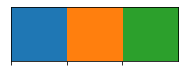

In [3]:
palette = sns.color_palette("tab10",3)
sns.palplot(palette)

In [4]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

## 1. Importations et lecture des fichiers

- Dataframe "**customers** " (fichier clients)

In [5]:
# Lecture du dataframe "customers" : liste des clients
df_customers = pd.read_csv('customers.csv', encoding=ENCODAGE)

In [6]:
df_customers.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


- Dataframe " **products** " (fichier produits)

In [7]:
# Lecture du dataframe "products" : liste des produits
df_products = pd.read_csv('products.csv', encoding=ENCODAGE)

In [8]:
df_products.head(5)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


- Dataframe " **transactions** " (fichier ventes)

In [9]:
# Lecture du dataframe "transactions" avec conversion de la colonne 'date' en datetime
# df_transactions = pd.read_csv('transactions.csv',parse_dates=[1], infer_datetime_format=True)

In [10]:
df_transactions = pd.read_csv('transactions.csv', encoding=ENCODAGE)

In [11]:
df_transactions.head(5)

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


## 2- Nettoyage des données

#### gestion des dates : site https://pandas.pydata.org/pandas-docs/version/0.18.1/search.html?q=.dt.

### 2.1 Dataframe 'customers' :

Modifications principales :
 - Suppression des 2 clients factices créés pour des tests ( 'ct_0' et 'ct_1' )
 - Mise en majuscule des données de la colonne 'sex' pour une meilleure visibilité
 - Renommage des colonnes

In [12]:
df_customers.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [13]:
# Type de dataframe
type(df_customers)

pandas.core.frame.DataFrame

Nombre de lignes et colonnes :

In [14]:
df_customers.shape

(8623, 3)

Type des colonnes :

In [15]:
# Type des colonnes
df_customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

L’**année** de naissance est en **integer**. Le **genre** et l’**ID client** sont des **objets**. Il est inutile de faire du re typage.

Informations rapides sur les variables du dataframe :

In [16]:
# Info sur les données => pas de valeurs manquantes 
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [17]:
# Etude des année de naissance
df_customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


Combien y a-t-il de valeurs distinctes pour chaque variable ? 

In [18]:
# Voir les valeurs distinctes => 76 dates de naissances pour 8623 clients 
df_customers.nunique()

client_id    8623
sex             2
birth          76
dtype: int64

 - **client_id** : 8623 "client_id" soit le nombre de clients référencés dans le fichier
 - **sex** : pour le genre, il y a 2 valeurs distinctes (f et m)
 - **birth** : il a 76 années de naissance ( valeur cohérente car à l'échelle d'une vie humaine )

Traitement des valeurs manquantes :

In [19]:
# Valeurs manquantes => aucune
df_customers.isna().mean(axis=0)

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

Traitement des valeurs dupliquées :

In [20]:
# Valeurs dupliquées => aucune
df_customers.duplicated(subset=['client_id']).sum()

0

Traitement des valeurs null :

In [21]:
# Pour avoir la somme des valeurs null => aucune valeur null
df_customers.isnull().sum().sort_values(ascending=False)

birth        0
sex          0
client_id    0
dtype: int64

Vérification de la cohérence des intitulés :

In [22]:
# Vérification de la cohérence des intitulés => ct_0 et ct_1 ???
df_customers.sort_values('client_id', ascending=False).head(5)

,client_id,sex,birth
8494,ct_1,m,2001
2735,ct_0,f,2001
7358,c_999,m,1964
2145,c_998,m,2001
94,c_997,f,1994


=> 2 "client_id" diffèrent de l'ensemble : "**ct_0**" et "**ct_1**". 
Ils correspondent à **des données test**.
Ils sont donc **supprimés** du dataframe.

In [23]:
# Suppression des clients test : 'ct_0'
df_customersSansTest = df_customers.drop(df_customers[(df_customers['client_id']=='ct_0')].index, axis=0)

In [24]:
# Suppression des clients test : 'ct_1'
df_customersSansTest = df_customersSansTest.drop(df_customers[(df_customers['client_id']=='ct_1')].index, axis=0)

Ré indexage du dataframe :

In [25]:
#  Ré indexage
df_customersSansTest = df_customersSansTest.reset_index(drop=True)

Vérification du bon fonctionnement de la **suppression des clients test** :

In [26]:
# Vérification de la suppression des clients test => suppression ok
df_customersSansTest.shape

(8621, 3)

In [27]:
# Pour montrer les variables catégoriques
df_customers.describe(include='O')

,client_id,sex
count,8623,8623
unique,8623,2
top,c_4474,f
freq,1,4491


In [28]:
# df_customers['sex'] = df_customers['sex'].map({'f' : 0,'m' : 1})

Visualisation de la répartition des années de naissance des clients :

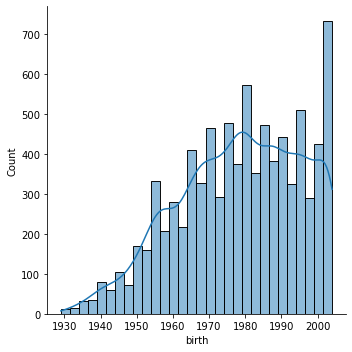

In [29]:
sns.displot(df_customers['birth'], kde=True)

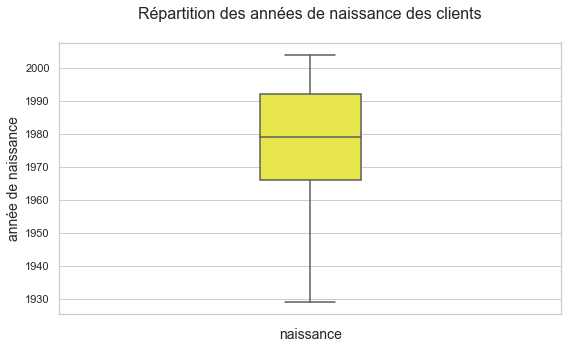

In [30]:
# Amplitude des âges => de ~1928 à ~2005
plt.figure(figsize=(9,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y='birth', data=df_customersSansTest, width=0.2, color='#ffff33')

plt.xlabel('naissance', size= 14)
plt.ylabel('année de naissance', size= 14)
plt.title('Répartition des années de naissance des clients\n', size= 16)
plt.savefig("Répartition des années de naissance des clients.png")
plt.show()


Les valeurs des **années de naissance** des clients sont **cohérentes**. Elles s'étalent de 1928 à 2005 approximativement.

Mise en majuscules des données de la colonne "sex" pour une meilleure visibilité.

In [31]:
# Champs de la colonne 'sex' en majuscule pour une meilleure visibilité
df_customersSansTest['sex'] = df_customersSansTest['sex'].str.upper()

Renommage des colonnes :

In [32]:
# Renommage des colonnes
df_customersSansTest = df_customersSansTest.rename({'client_id':'client_id',
                                   'sex' : 'sex',
                                   'birth' : 'year_of_birth'}, axis=1)
df_customersSansTest.head(5)

,client_id,sex,year_of_birth
0,c_4410,F,1967
1,c_7839,F,1975
2,c_1699,F,1984
3,c_5961,F,1962
4,c_5320,M,1943


### 2.2 Dataframe 'df_products'

Modifications principales :
 - Suppression des prix négatifs
 - Recherche de la signification de la colonne "categ"  (catégorie de prix ou de produit ?)
 - Intégration du produit 0_2245 avec un prix estimé par imputation de la moyenne des prix de la catégorie 0

In [33]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


Nombre de lignes et colonnes :

In [34]:
df_products.shape

(3287, 3)

Type des colonnes:

In [35]:
df_products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

Informations rapides sur les variables du dataframe :

In [36]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


Combien y a-t-il de valeurs distinctes pour chaque variable ? 

In [37]:
df_products.nunique()

id_prod    3287
price      1455
categ         3
dtype: int64

On observe **3 catégories** et **3287 produits** différents.

Traitement des valeurs manquantes :

In [38]:
# Valeurs manquantes => aucune
df_products.isnull().mean(axis=0)

id_prod    0.0
price      0.0
categ      0.0
dtype: float64

Traitement des valeurs dupliquées :

In [39]:
# Valeurs dupliquées => aucune
df_products.duplicated(subset=['id_prod']).sum()

0

In [40]:
# Pour montrer les variables catégoriques
df_products.describe(include='O')

,id_prod
count,3287
unique,3287
top,0_1069
freq,1


Traitement des données :

In [41]:
# Pour avoir les min et max des valeurs => price < 0 ???
df_products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


**Anomalie** : On observe un **tarif négatif**.

Visualisation de la répartition des prix des produits :

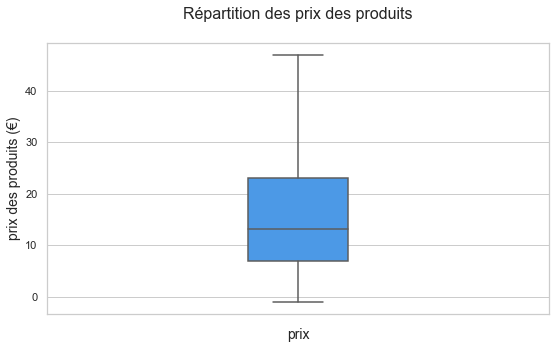

In [42]:
# df_products.boxplot('price', showfliers=False);
plt.figure(figsize=(9,5))
sns.set_theme(style="whitegrid")
sns.boxplot(y='price', data=df_products, width=0.2, color='#3399ff', showfliers=False)

plt.xlabel('prix', size= 14)
plt.ylabel('prix des produits (€)', size= 14)
plt.title('Répartition des prix des produits\n', size= 16)
plt.savefig("Répartition des prix des produits.png")
plt.show()

In [43]:
# Recherche des prix négatifs (=> valeur aberrante) 
df_priceNeg = df_products[df_products.price < 0]

In [44]:
df_priceNeg

,id_prod,price,categ
731,T_0,-1.0,0


Le prix négatif correspond au produit "T_0". Vraisemblablement il s'agit d'un produit créé pour un test.
Ce produit est donc **supprimé** du dataframe.

In [45]:
# On enlève les prix négatifs de df_products' 
df_products = df_products[~df_products.id_prod.isin(['T_0'])]
df_products.head(2)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0


In [46]:
# df_products.shape

In [47]:
df_products = df_products.drop(df_products[df_products['price'] < 0].index, axis=0)

Vérification du bon fonctionnement de la suppression du produit test :

In [48]:
# Vérification => il n'y a plus de prix négatifs
df_products[df_products.price < 0]

,id_prod,price,categ


Visualisation de la répartition des prix des produits :

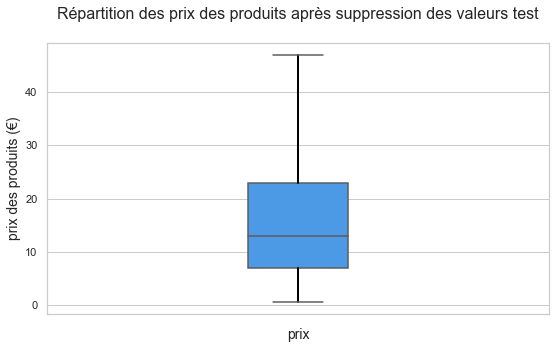

In [49]:
plt.figure(figsize=(9,5))
sns.set_theme(style="whitegrid")
whiskerprops = dict(color='black',
                     linewidth=2)
sns.boxplot(y='price', data=df_products, width=0.2, color='#3399ff', showfliers=False,
           whiskerprops=whiskerprops)

plt.xlabel('prix', size= 14)
plt.ylabel('prix des produits (€)', size= 14)
plt.title('Répartition des prix des produits après suppression des valeurs test\n', size= 16)
plt.savefig("Répartition des prix des produits après suppression des valeurs test.png")
plt.show()

Les prix négatifs ont bien été supprimés.

Ré indexage du dataframe :

In [50]:
# Ré indexage
df_products = df_products.reset_index(drop=True)

In [51]:
df_products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


#### A quoi correspondent les **catégories** ? Tranche de prix ou nature des produits ?

<AxesSubplot:>

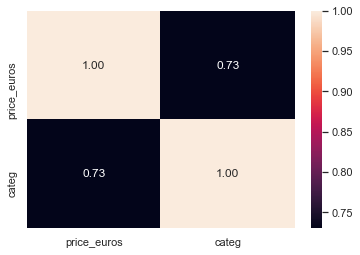

In [99]:
# recherche de corrélations
sns.heatmap(df_products.corr(), annot=True, fmt=".2f")

Comme attendu, il semble que les catégories soient corrélées aux prix.

Prix moyen de chaque catégorie :

In [52]:
# 'categ' => tranche de prix ???
df_products.groupby(['categ']).mean()

,price
categ,
0,11.732795
1,25.531421
2,108.354686


Analyse de la **catégorie 0** :

In [53]:
# 'categ'=0 => 0.62 < price < 40.99
df_products[df_products['categ'] == 0].describe()

,price,categ
count,2308.000000,2308.0
mean,11.732795,0.0
std,7.565755,0.0
min,0.620000,0.0
25%,5.587500,0.0
50%,10.320000,0.0
75%,16.655000,0.0
max,40.990000,0.0


Les prix sont compris entre 0.62€ et 40.99€

Analyse de la **catégorie 1** :

In [54]:
# 'categ'=1 => 2 < price < 80.99
df_products[df_products['categ'] == 1].describe()

,price,categ
count,739.000000,739.0
mean,25.531421,1.0
std,15.425162,0.0
min,2.000000,1.0
25%,13.390000,1.0
50%,22.990000,1.0
75%,33.990000,1.0
max,80.990000,1.0


Les prix sont compris entre 2 € et 80.99€

Analyse de la **catégorie 2** :

In [55]:
# 'categ'=2 => 30.99 < price < 300
df_products[df_products['categ'] == 2].describe()

,price,categ
count,239.000000,239.0
mean,108.354686,2.0
std,49.561431,0.0
min,30.990000,2.0
25%,71.065000,2.0
50%,101.990000,2.0
75%,136.530000,2.0
max,300.000000,2.0


Les prix sont compris entre 30.99 € et 300€

Visualisation de la distribution des **catégories de produits** :

<Figure size 720x504 with 0 Axes>

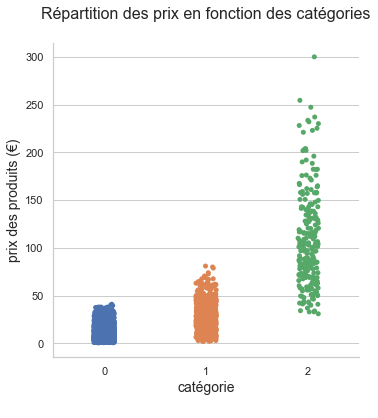

In [56]:
# Visualisation des catégories => catégories semblent être des catégories de produits et non de prix (homogénéité de la distribution)
plt.figure(figsize=(10, 7))
sns.catplot(x='categ', y='price', data=df_products)

plt.title('Répartition des prix en fonction des catégories\n', size= 16)
plt.xlabel('catégorie\n', size= 14)
plt.ylabel('prix des produits (€)', size= 14)
plt.savefig("Répartition des prix en fonction des catégories.png")
plt.show()

In [57]:
for cat in df_products["categ"].unique():
    subset = df_products[df_products.categ == cat] # Création du sous-échantillon
    print("var {}:\n".format(cat),subset['price'].var(ddof=0))
    print("ect {}:\n".format(cat),subset['price'].std(ddof=0))
    print("mode {}:\n".format(cat), subset['price'].mode())

var 0:
 57.215847172726775
ect 0:
 7.564115756169175
mode 0:
 0    4.99
dtype: float64
var 1:
 237.61364304211
ect 1:
 15.414721633623813
mode 1:
 0    22.99
1    32.99
dtype: float64
var 2:
 2446.0578977048704
ect 2:
 49.45763740520639
mode 2:
 0    50.99
1    68.99
2    69.99
dtype: float64


Visualisation des catégories

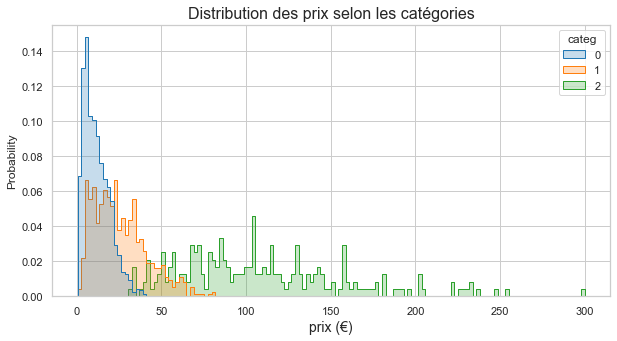

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(x='price', data=df_products, hue='categ', palette=palette, element="step", stat="probability", common_norm=False)
plt.title('Distribution des prix selon les catégories', size=16)
plt.xlabel('prix (€)', size= 14)
# plt.ylabel('Count')
plt.savefig("Distribution des prix selon les catégories.jpg")
plt.show()

Autre visualisation

In [59]:
df_products["categ"].unique()

array([0, 1, 2], dtype=int64)

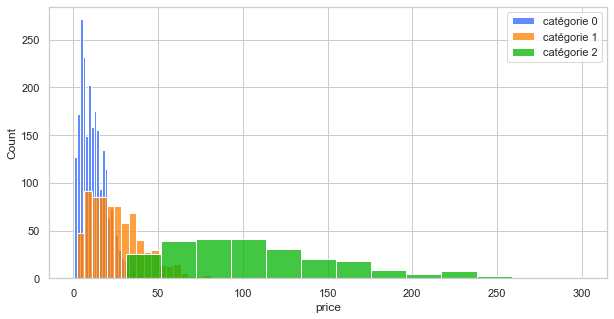

In [60]:
plt.figure(figsize=(10,5))
for cat in df_products["categ"].unique():
    subset = df_products[df_products.categ == cat]
    if cat == 0 :
        sns.histplot(data=subset, x="price", color="#2E64FE", label="catégorie 0")
    elif cat == 1 :
        sns.histplot(data=subset, x="price", color="#FF8000", label="catégorie 1")
    else : 
        sns.histplot(data=subset, x="price", color="#04B404", label="catégorie 2")        

plt.legend() 
plt.show()

In [61]:
X = "categ" # qualitative
Y = "price" # quantitative    
eta_squared(df_products[X],df_products[Y]) 

0.6951593460624856

L'éta² est de 0.69. Il existe donc une corrélation entre le prix des produits et les catégories. 

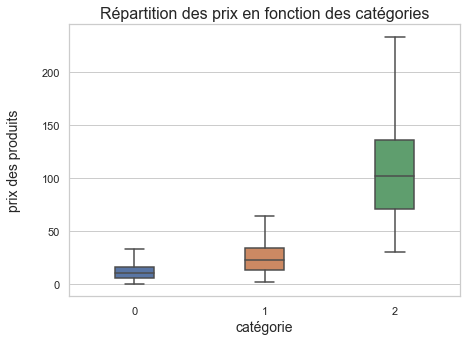

In [62]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='categ', y='price', data=df_products, width=0.3, showfliers=False)
plt.title('Répartition des prix en fonction des catégories', size=16)
plt.xlabel('catégorie\n', size=14)
plt.ylabel('prix des produits\n', size=14)
plt.savefig("Répartition des prix en fonctions des catégories (box).png")
plt.show()

Conclusion : chaque catégorie regroupe des produits appartenant à une même classe tarifaire. 

Renommage des colonnes :

In [63]:
# Renommage des colonnes
df_products = df_products.rename({'id_prod':'id_prod',
                                   'price' : 'price_euros',
                                   'categ' : 'categ'}, axis=1)
df_products.head(5)

,id_prod,price_euros,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


### 2.3 Dataframe 'transactions'

Modifications principales : 
 - Suppression des transactions créées pour des tests
 -  Changement de type de la colonne "date" en datetime 64
 - Compréhension de la colonne "session_id'" ( 1 connexion = 1 session_id). Il peut avoir plusieurs produits pour une même session_id.

In [64]:
df_transactions.head(3)

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270


In [65]:
df_transactions[df_transactions['date']=='test_2021-03-01 02:30:02.237413']

,id_prod,date,session_id,client_id
57755,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
59043,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
95537,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
100544,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
109107,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
132564,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
141623,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
190020,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
193446,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_1
267907,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0


ct_0, ct_1, s_0 et T_0 sont des données tests

Nombre de lignes et colonnes :

In [66]:
df_transactions.shape 

(337016, 4)

Vérification de la cohérence des données de la colonne "date" :

In [67]:
# Vérification cohérence des valeurs de 'date'
df_transactions['date'].value_counts()

test_2021-03-01 02:30:02.237413    13
test_2021-03-01 02:30:02.237444     8
test_2021-03-01 02:30:02.237427     8
test_2021-03-01 02:30:02.237414     8
test_2021-03-01 02:30:02.237428     8
                                   ..
2021-12-09 12:11:59.021921          1
2021-07-17 09:25:16.619348          1
2022-02-19 07:16:32.920647          1
2021-11-15 15:28:30.714588          1
2021-08-25 17:47:53.958498          1
Name: date, Length: 336855, dtype: int64

Il apparaît des valeurs relatives à des tests dans la colonne "date".
Recherche de l'ensemble ces valeurs tests.

In [68]:
# Recherche des transactions correspondant à 'test_.....'
df_test = df_transactions[df_transactions.date.str.startswith('test')]

In [69]:
df_test.shape

(200, 4)

Ces valeurs test correspondent à un produit test "**T_0**". Vérification qu'il n'y a pas d'autre intitulé de produit test.

In [70]:
# Vérification que seul  id_prod = T_0 correspond à des tests
df_test['id_prod'].unique()

array(['T_0'], dtype=object)

**Suppression** des valeurs relatives aux **tests** :

In [71]:
# Suppression des datas de test
df_transactionsSansTest = df_transactions.drop(df_transactions[df_transactions['id_prod'] == 'T_0'].index, axis=0)

Vérification du bon fonctionnement de la suppression des valeurs test :

In [72]:
# Vérification de la suppression des datas de test => 200 lignes enlevées = nombre de tests
df_transactions.shape

(337016, 4)

Informations rapides sur les variables du dataframe :

In [73]:
df_transactionsSansTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     336816 non-null  object
 1   date        336816 non-null  object
 2   session_id  336816 non-null  object
 3   client_id   336816 non-null  object
dtypes: object(4)
memory usage: 12.8+ MB


Conversion de la colonne "**date**" en format **datetime** :

In [74]:
# Conversion de la colonne 'date' de objet en datetime64[ns] (Avant traitement rajout de ", errors='coerce', format='%Y-%m-%d %H:%M:%S.%f'" => données 'date' douteuses)
df_transactionsSansTest['date'] = pd.to_datetime(df_transactionsSansTest['date'])

In [75]:
# Vérification que la colonne 'date' est convertie en datetime
df_transactionsSansTest.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

Traitement des valeurs manquantes :

In [76]:
# Valeurs manquantes
df_transactionsSansTest.isna().mean(axis=0)

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

Traitement des valeurs dupliquées :

In [77]:
# Valeurs dupliquées de 'session_id '=> doit-on les enlever ????
df_transactionsSansTest.duplicated(subset=['session_id']).sum()

167622

Quid des "**session_id**" ? Une connexion correspond - t- elle vraiment à un **produit acheté** ?

In [78]:
# Classement des 'session_id' => 's_99998' apparaît 3 fois
df_transactionsSansTest['session_id'].sort_values() 

176588        s_1
309544       s_10
42033       s_100
148924      s_100
328736     s_1000
           ...   
195828    s_99996
91103     s_99997
251881    s_99998
8129      s_99998
143919    s_99998
Name: session_id, Length: 336816, dtype: object

In [79]:
# Affichage de 'session_id' = 's_99998' =>'session_id' correspond à la session d'achat => on garde les duplicate 'session_id' 
df_transactionsSansTest[df_transactionsSansTest['session_id']== 's_99998']

,id_prod,date,session_id,client_id
8129,0_1604,2021-10-04 19:00:20.030388,s_99998,c_2795
143919,0_1411,2021-10-04 18:50:59.099942,s_99998,c_2795
251881,0_1572,2021-10-04 18:45:54.374885,s_99998,c_2795


Une **session** correspond à une **connexion**. Lors d'une connexion (même "session_id), il peut y avoir **plusieurs produits achetés**. Donc ce ne sont pas des valeurs dupliquées.

In [80]:
df_transactionsSansTest = df_transactionsSansTest.reset_index(drop=True)

**Vérification que toutes les transactions portent sur un produit. Pour cela, on récupère toutes les données du dataframe "transactions" en effectuant une jointure sur le dataframe "products".**

Jointure à gauche :

In [81]:
# Vérification que tous les transactions portent sur des produits existants
df_transSansTestProduct = pd.merge(df_transactionsSansTest, df_products, on='id_prod', how='left')

Ré indexage du dataframe :

In [82]:
df_transSansTestProduct = df_transSansTestProduct.reset_index(drop=True)

Nombre de lignes et colonnes :

In [83]:
df_transSansTestProduct.shape

(336816, 6)

Traitement des valeurs manquantes :

In [84]:
# Vérification des valeurs Null (qui ne pointent sur rien)=> il y a en a dans 'price_euros' et 'categ' (103 valeurs)
df_transSansTestProduct.isnull().sum()

id_prod          0
date             0
session_id       0
client_id        0
price_euros    103
categ          103
dtype: int64

Il y a **103 valeurs null**. Ce qui signifie qu'il y a 103 transactions qui ne correspondent à **aucun produit référencé** dans le fichier "products".

In [85]:
# Affichage des données Null => le produit 'id_prod ' = 0_2245 n'a pas de prix ni de catégorie (NaN)
df_transSansTestProductImput = df_transSansTestProduct[df_transSansTestProduct.categ.isnull()]

In [86]:
df_transSansTestProductImput.head(2)

,id_prod,date,session_id,client_id,price_euros,categ
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN


In [87]:
df_transSansTestProductImput.date.min()

Timestamp('2021-03-01 00:09:29.301897')

In [88]:
df_transSansTestProductImput.date.max()

Timestamp('2022-02-28 18:08:49.875709')

Le produit 0_2245 a été vendu du 01 mars 2011 au 28 février 2022. Ce produit est donc toujours au catalogue donc on ne peut pas le supprimer.

Le produit 0_2245 n'est pas référencé dans le dataframe products. On ne connaît donc pas son prix. Je suppose que sa catégorie est '0' compte tenu de son id_prod (0_2245). 
Au vu des 103 références, je décide d'**imputer** la valeur du produit en question en prenant **la moyenne de la valeur du prix des produits de la catégorie 0**.

Nombre de lignes et colonnes :

In [89]:
df_transSansTestProductImput.shape

(103, 6)

In [90]:
# Imputation de la valeur du produit '0_2245' en prenant la moyenne de la valeur de la catégorie 0
df_prodCatZero = df_products.loc[(df_products['categ'] ==0), :]

In [91]:
# Calcul du prix moyen de la catégorie 0
moy_catZero = df_prodCatZero.price_euros.mean()
print('le prix moyen d\'un produit issu de la catégorie 0 est de {}€'.format(round(moy_catZero,2)))

le prix moyen d'un produit issu de la catégorie 0 est de 11.73€


Intégration du produit "0_2245" dans le dataframme "products" avec un tarif de 11.73€ et une catégorie 0.

In [92]:
# Intégration du produit '0_2245' dans le dataframe 'products' (ajoute une nouvelle ligne)
df_products = df_products.append({'id_prod' : '0_2245', 'price_euros' : 11.73, 'categ' : 0 }, ignore_index=True)

In [93]:
# Vérification de l'insertion de '0_2245' dans df_products
df_products[df_products['id_prod']=='0_2245']

,id_prod,price_euros,categ
3286,0_2245,11.73,0


In [94]:
# Ré indexage
df_products = df_products.reset_index(drop=True)

In [95]:
df_transactionsSansTest.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

## 3. Export en csv des dataframes nettoyés 

In [96]:
# Export du dataframe 'customers_clean' en csv
df_customersSansTest.to_csv("customers_clean.csv", index = False, encoding='UTF-8')

In [97]:
# Export du dataframe 'products_clean' en csv
df_products.to_csv("products_clean.csv", index = False, encoding='UTF-8')

In [98]:
# Export du dataframe 'customers_clean' en csv
df_transactionsSansTest.to_csv("transactions_clean.csv", index = False, encoding='UTF-8')